In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#read in data into pandas with low_memory=False
df = pd.read_csv('/Users/morganabbitt/galvanize/capstone/NFL-Analytics//data/NFL Play by Play 2009-2018 (v5).csv', low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
#important features
#play_id, game_id, home_team, away_team, posteam, posteam_type, defteam, side_of_field, yardline_100,
#game_date, game_seconds_remaining, drive, sp, qtr, down, goal_to_go, time, yrdln, ydstogo, 
#total_home_score, total_away_score, posteam_score, defteam_score, ep, epa, wp, play_type 
#third_down_converted, third_down_failes, fourth_down_converted, fourth_down_failed, penalty, touchdown
#quarter_end

In [6]:
df = df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100'
,'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
'quarter_end']]

In [7]:
df = df[(df['qtr'] == 1.0) | (df['qtr'] == 3.0)]
df = df[df['quarter_end'] == 0]
df = df[df['down'].notna()]

In [36]:
def clean_data(filepath):
    #read the pathname of the file in, use low_memory=False
    df = pd.read_csv(filepath, low_memory=False)
    #lst of important columns out of 255
    lst_cols = ['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
        'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
        'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
        'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
        'quarter_end']
    #grabbing all important columns
    df = df[lst_cols]
    #grabbing only the 1st and third quarters to avoid time constraints and large leads
    df = df[(df['qtr'] == 1) | (df['qtr'] == 3)]
    #getting rid of plays at the end of the quarters
    df = df[df['quarter_end'] == 0]
    #gets rid of plays that are extra points or kick offs 
    df = df[df['down'].notna()]
    #returns df with all downs from quarters 1 and 3
    return df
    

In [27]:
#uses clean df to grab all 4th downs
def fourth_downs(df):
    mask_4th = df['down'] == 4.0
    return df[mask_4th]

In [50]:
#uses 4th down df to grab moments that were 'go for it'
def fourth_pass_or_run(df_4ths, df):
    mask_go = (df['play_type'] == 'pass') | (df['play_type'] == 'run')
    return df_4ths[mask_go]

In [31]:
# mask4th = df['down'] == 4.0
# mask_go = (df['play_type'] == 'pass') | (df['play_type'] == 'run')
# new = df[mask4th]
# new[mask_go]

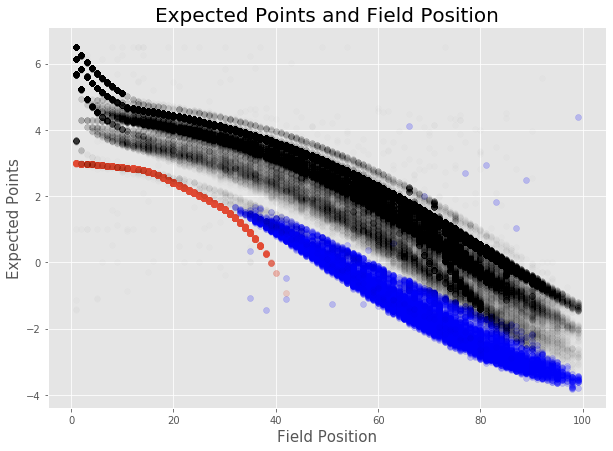

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Expected Points and Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.ylabel('Expected Points', size=15)
plt.scatter(df[df['play_type'] == 'field_goal']['yardline_100'].values, df[df['play_type'] == 'field_goal']['ep'].values, alpha=0.2, label='Field Goal')
plt.scatter(df[df['play_type'] == 'punt']['yardline_100'].values, df[df['play_type'] == 'punt']['ep'].values, alpha=0.2, c='b', label='Punt')
plt.scatter(df[(df['play_type'] == 'pass') | (df['play_type'] == 'run')]['yardline_100'].values, df[(df['play_type'] == 'pass') | (df['play_type'] == 'run')]['ep'].values, alpha=0.01, c='k', label='Punt')
#plt.legend()

In [38]:
dataframe = clean_data('/Users/morganabbitt/galvanize/capstone/NFL-Analytics//data/NFL Play by Play 2009-2018 (v5).csv')

In [51]:
fourths = fourth_downs(dataframe)
fourths

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,game_seconds_remaining,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,total_home_score,total_away_score,posteam_score,defteam_score,ep,epa,wp,play_type,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,penalty,touchdown,quarter_end
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,3507.0,1,0,1,4.0,0.0,13:27,PIT 44,8,0,0,0.0,0.0,-0.699436,2.097796,0.461217,punt,0.0,0.0,0.0,0.0,0.0,0.0,0
8,228,2009091000,PIT,TEN,TEN,away,PIT,TEN,96.0,2009-09-10,3394.0,2,0,1,4.0,0.0,11:34,TEN 4,8,0,0,0.0,0.0,-3.393288,-0.021313,0.382456,punt,0.0,0.0,0.0,0.0,0.0,0.0,0
14,365,2009091000,PIT,TEN,PIT,home,TEN,TEN,41.0,2009-09-10,3205.0,3,0,1,4.0,0.0,08:25,TEN 41,21,0,0,0.0,0.0,0.757343,-0.311925,0.514075,punt,0.0,0.0,0.0,0.0,0.0,0.0,0
20,522,2009091000,PIT,TEN,TEN,away,PIT,PIT,19.0,2009-09-10,3108.0,4,0,1,4.0,0.0,06:48,PIT 19,7,0,0,0.0,0.0,2.487035,-3.632243,0.569509,field_goal,0.0,0.0,0.0,0.0,0.0,0.0,0
24,603,2009091000,PIT,TEN,PIT,home,TEN,PIT,79.0,2009-09-10,3002.0,5,0,1,4.0,0.0,05:02,PIT 21,16,0,0,0.0,0.0,-2.604561,1.526354,0.413994,punt,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449238,874,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,2753.0,5,0,1,4.0,0.0,00:53:00,CAR 34,1,7,3,7.0,3.0,-0.569726,-0.458080,0.581514,punt,0.0,0.0,0.0,0.0,0.0,0.0,0
449296,2302,2018121700,CAR,NO,NO,away,CAR,NO,61.0,2018-12-17,1663.0,13,0,3,4.0,0.0,12:43:00,NO 39,10,7,6,6.0,7.0,-1.217029,1.147381,0.428326,punt,0.0,0.0,0.0,0.0,0.0,0.0,0
449301,2417,2018121700,CAR,NO,CAR,home,NO,CAR,85.0,2018-12-17,1602.0,14,0,3,4.0,0.0,11:42:00,CAR 15,12,7,6,7.0,6.0,-3.000972,2.221340,0.419524,punt,0.0,0.0,0.0,0.0,1.0,0.0,0
449306,2561,2018121700,CAR,NO,NO,away,CAR,NO,70.0,2018-12-17,1483.0,15,0,3,4.0,0.0,09:43:00,NO 30,4,7,6,6.0,7.0,-1.637095,4.278250,0.409143,no_play,0.0,0.0,0.0,0.0,1.0,0.0,0


In [52]:
pass_or_run = fourth_pass_or_run(fourths, dataframe)
pass_or_run

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,game_seconds_remaining,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,total_home_score,total_away_score,posteam_score,defteam_score,ep,epa,wp,play_type,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,penalty,touchdown,quarter_end
813,2639,2009091305,HOU,NYJ,HOU,home,NYJ,HOU,51.0,2009-09-13,1117.0,14,0,3,4.0,0.0,03:37,HOU 49,2,0,17,0.0,17.0,0.324873,-3.436406,0.062612,pass,0.0,0.0,0.0,1.0,0.0,0.0,0
1051,623,2009091303,CIN,DEN,CIN,home,DEN,DEN,42.0,2009-09-13,3016.0,4,0,1,4.0,0.0,05:16,DEN 42,2,0,0,0.0,0.0,1.073098,2.712727,0.525684,run,0.0,0.0,1.0,0.0,0.0,0.0,0
1056,742,2009091303,CIN,DEN,CIN,home,DEN,DEN,10.0,2009-09-13,2811.0,4,0,1,4.0,0.0,01:51,DEN 10,2,0,0,0.0,0.0,2.793123,-5.423456,0.564278,run,0.0,0.0,0.0,1.0,0.0,0.0,0
1199,369,2009091302,CAR,PHI,CAR,home,PHI,PHI,2.0,2009-09-13,3195.0,1,0,1,4.0,0.0,08:15,PHI 2,1,0,0,0.0,0.0,2.979011,3.517587,0.567191,run,0.0,0.0,1.0,0.0,0.0,0.0,0
2319,2280,2009091312,GB,CHI,CHI,away,GB,GB,37.0,2009-09-13,1560.0,17,0,3,4.0,0.0,11:00,GB 37,1,10,2,2.0,10.0,1.571641,2.223794,0.277984,run,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447400,2830,2018121602,BUF,DET,BUF,home,DET,DET,13.0,2018-12-16,1109.0,13,0,3,4.0,0.0,03:29:00,DET 13,2,7,13,7.0,13.0,2.719028,-2.565330,0.360445,run,0.0,0.0,0.0,1.0,0.0,0.0,0
447829,672,2018121604,CIN,OAK,CIN,home,OAK,OAK,37.0,2018-12-16,3044.0,6,0,1,4.0,0.0,05:44:00,OAK 37,2,0,0,0.0,0.0,1.466742,2.626431,0.538156,pass,0.0,0.0,1.0,0.0,0.0,0.0,0
448024,812,2018121608,NYG,TEN,TEN,away,NYG,NYG,1.0,2018-12-16,2867.0,3,1,1,4.0,1.0,02:47:00,NYG 1,1,0,6,0.0,0.0,3.680486,3.319514,0.583234,run,0.0,0.0,1.0,0.0,0.0,1.0,0
449139,3142,2018121611,LA,PHI,LA,home,PHI,LA,70.0,2018-12-16,943.0,17,0,3,4.0,0.0,00:43:00,LA 30,5,13,30,13.0,30.0,-1.501199,-2.593384,0.041334,pass,0.0,0.0,0.0,1.0,0.0,0.0,0


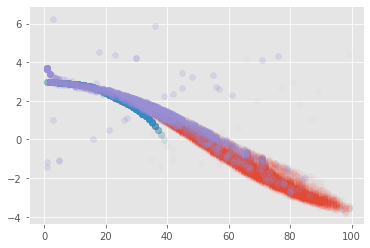

In [56]:
fig, ax = plt.subplots()
plt.scatter(fourths[fourths['play_type'] == 'punt']['yardline_100'].values, fourths[fourths['play_type'] == 'punt']['ep'].values,alpha=0.02)
plt.scatter(fourths[fourths['play_type'] == 'field_goal']['yardline_100'].values, fourths[fourths['play_type'] == 'field_goal']['ep'].values, alpha=0.02)
plt.scatter(pass_or_run['yardline_100'].values, pass_or_run['ep'].values, alpha=0.2)